In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [30]:
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

In [31]:
train_feature_vector = train_feature.reshape(len(train_feature),28,28,1).astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),28,28,1).astype('float32')

In [32]:
train_feature_normalize = train_feature_vector/225 #Normalize the features
test_feature_normalize = test_feature_vector/225

In [33]:
train_label_onehot = np_utils.to_categorical(train_label) #One-Hot encoding
test_label_onehot = np_utils.to_categorical(test_label)

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(filters=10, kernel_size=(3,3), padding='same', input_shape=(28,28,1), activation='relu'))

In [37]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [38]:
model.add(Conv2D(filters=20, kernel_size=(3,3), padding='same', activation='relu'))

In [39]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [40]:
model.add(Dropout(0.2))

In [42]:
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
train_start = model.fit(x=train_feature_normalize,
                       y=train_label_onehot,
                       validation_split=0.2,
                       epochs=10,
                       batch_size=200,
                       verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 71s - loss: 0.4005 - accuracy: 0.8826 - val_loss: 0.1162 - val_accuracy: 0.9665
Epoch 2/10
 - 61s - loss: 0.1168 - accuracy: 0.9642 - val_loss: 0.0823 - val_accuracy: 0.9763
Epoch 3/10
 - 64s - loss: 0.0844 - accuracy: 0.9738 - val_loss: 0.0623 - val_accuracy: 0.9810
Epoch 4/10
 - 73s - loss: 0.0669 - accuracy: 0.9795 - val_loss: 0.0577 - val_accuracy: 0.9830
Epoch 5/10
 - 65s - loss: 0.0551 - accuracy: 0.9824 - val_loss: 0.0463 - val_accuracy: 0.9872
Epoch 6/10
 - 64s - loss: 0.0468 - accuracy: 0.9856 - val_loss: 0.0480 - val_accuracy: 0.9868
Epoch 7/10
 - 65s - loss: 0.0406 - accuracy: 0.9868 - val_loss: 0.0450 - val_accuracy: 0.9871
Epoch 8/10
 - 64s - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0447 - val_accuracy: 0.9872
Epoch 9/10
 - 64s - loss: 0.0330 - accuracy: 0.9889 - val_loss: 0.0400 - val_accuracy: 0.9891
Epoch 10/10
 - 64s - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.0343 - val_accuracy: 0.9902


In [50]:
accuracy = model.evaluate(test_feature_normalize, test_label_onehot)
print ('Accurcy: %3f' %accuracy[1] )

10000/10000 [==============================] - 6s 612us/step
Accurcy: 0.990700


In [51]:
prediction = model.predict_classes(test_feature_normalize)

In [45]:
def show_image_labels_predictions(images, labels, predictions, start_id, num=10):
    plt.gcf().set_size_inches(12, 14)
    
    if num>25: num=25
    
    for i in range(num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[i], cmap = 'binary')
        
        if( len(predictions) > 0):
            title = 'Prediction = %s' %(predictions[start_id])
            
            title += ('Correct' if predictions[start_id] == labels[start_id] else ' Wrong')
            
            title += '\n label =' + str(labels[start_id])
            
        else: 
            title = 'Label = %s' %(labels[start_id])
            
        start_id += 1
            
        ax.set_title(title, fontsize = 12)
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

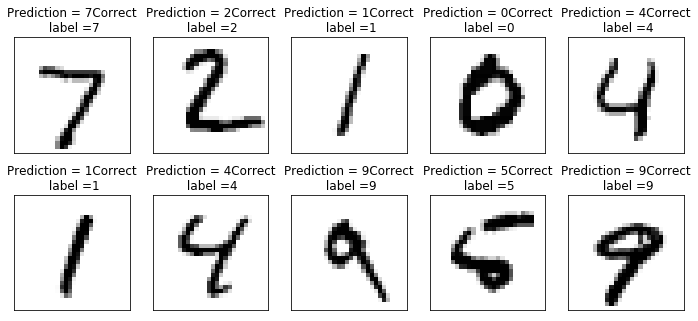

In [52]:
show_image_labels_predictions(test_feature, test_label, prediction,0,10)

In [55]:
model.save('Minst by Keras_CNN.h5')
model.save_weights('Minst by Keras_CNN.weight ')